In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import re

In [2]:
os.chdir('/Users/camillemitchell/Documents/EPFL/GitHub/ada-2019-project-jech') 
data = pd.read_csv('food-inspections.csv')

## 1. Removing empty columns

Removing the last 5 NaN columns:

In [3]:
data.drop(columns = ['Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards'], inplace = True)
print('The dataset has size: ', data.shape)
data.head()

The dataset has size:  (194784, 17)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2320260,GOPUFF,GOPUFF,2684560.0,Grocery Store,Risk 3 (Low),1801 W WARNER AVE,CHICAGO,IL,60613.0,2019-10-22T00:00:00.000,License,Fail,NaN,41.956846,-87.674395,"{'longitude': '41.956845683288854', 'latitude'..."
1,2320248,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313942.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,NaN,41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
2,2320245,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313945.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
3,2320269,LA CHAPARRITA,LA CHAPARRITA,2689521.0,Mobile Food Preparer,Risk 2 (Medium),2300 S THROOP ST,CHICAGO,IL,60608.0,2019-10-22T00:00:00.000,License Re-Inspection,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.850451,-87.658798,"{'longitude': '41.85045102427', 'latitude': '-..."
4,2320232,WALGREENS #10771,WALGREENS #10771,1898193.0,Grocery Store,Risk 3 (Low),6460 W FULLERTON AVE,CHICAGO,IL,60707.0,2019-10-22T00:00:00.000,Canvass,Out of Business,NaN,41.923769,-87.787626,"{'longitude': '41.92376935343716', 'latitude':..."


## 2. Facility inspection

We only want to select inspections on facilities that prepare the food themselves. That is, we want to exclude grocery stores, gas stations, schools, etc. 

In [4]:
pd.set_option('display.max_rows', None)
data['Facility Type'].value_counts()

Restaurant                                         129813
Grocery Store                                       24838
School                                              12082
Children's Services Facility                         3007
Bakery                                               2856
Daycare (2 - 6 Years)                                2693
Daycare Above and Under 2 Years                      2335
Long Term Care                                       1336
Catering                                             1190
Mobile Food Dispenser                                 869
Liquor                                                854
Daycare Combo 1586                                    746
Mobile Food Preparer                                  621
Golden Diner                                          562
Hospital                                              545
Wholesale                                             535
TAVERN                                                281
Daycare (Under

Restaurant, cafe, tavern/bar, ice-cream, deli, bakery, dessert, hot dog, juice, sushi. 
The main reason to go to the facility is to eat, nothing else.

In [5]:
# make all the facilities with "restaurant" a restaurant etc.

#initializing the regex 
REST = "rest|diner|sushi|taqueria|hot.dog|grill|cuisine|jap.nese|sandwich|bbq|pizza|burrito|mcdo|mc do|kimchee|chicken|pollo|fish|pasta|taco|rice|fast.food|bagel|noodle|sub|pita|kebab|kabob|seafood|shrimp|thai|african|chinese|burger|porkchop|wendy"
BAR = "bar|hooka|bistro|brewery"
TAVERN = "tavern"
COFFEE = "cafe|caffe|coffee"
DESSERT = "gelato|ice.cream|paleteria|dessert|cand.|chocolate|cookies|cake|patisserie|sweet"
BAKERY = "bakery|donut"
DRINKS = "shake|juice|smoothie|tea"
SNACK = "snack|snak|popcorn"
DELI = "deli"

#make a for loop? - here we are initializing the searches
no_facility = data['Facility Type'].isnull() 
facility_rest = data['Facility Type'].str.contains(pat = REST, case=False, regex=True, na=False)
dba_rest = data['DBA Name'].str.contains(pat = REST, case = False, regex = True, na=False)
facility_bar = data['Facility Type'].str.contains(pat = BAR, case=False, regex=True, na=False)
dba_bar = data['DBA Name'].str.contains(pat = BAR, case = False, regex = True, na=False)
facility_tavern = data['Facility Type'].str.contains(pat = TAVERN, case=False, regex=True, na=False)
dba_tavern =  data['DBA Name'].str.contains(pat = TAVERN, case = False, regex = True, na=False)
facility_coffee = data['Facility Type'].str.contains(pat = COFFEE, case=False, regex=True, na=False)
dba_coffee = data['DBA Name'].str.contains(pat = COFFEE, case = False, regex = True, na=False)
facility_dessert = data['Facility Type'].str.contains(pat = DESSERT, case=False, regex=True, na=False)
dba_dessert = data['DBA Name'].str.contains(pat = DESSERT, case = False, regex = True, na=False)
facility_bakery = data['Facility Type'].str.contains(pat = BAKERY, case=False, regex=True, na=False)
dba_bakery = data['DBA Name'].str.contains(pat = BAKERY, case = False, regex = True, na=False)
facility_drinks = data['Facility Type'].str.contains(pat = DRINKS, case=False, regex=True, na=False)
dba_drinks = data['DBA Name'].str.contains(pat = DRINKS, case = False, regex = True, na=False)
facility_snack = data['Facility Type'].str.contains(pat = SNACK, case=False, regex=True, na=False)
dba_snack = data['DBA Name'].str.contains(pat = SNACK, case = False, regex = True, na=False)
facility_deli = data['Facility Type'].str.contains(pat = DELI, case=False, regex=True, na=False)
dba_deli =  data['DBA Name'].str.contains(pat = DELI, case = False, regex = True, na=False)

In [6]:
#ex. : finding the data that has restaurant as facility name, or if there is no value in the Facility column, checking with the DBA Name
#by going through the dba names and checking the name (no defined facility type), we avoid losing 4781 rows, instead we only lose 2948.
data.loc[facility_rest|(no_facility & dba_rest), 'Facility Type'] = 'Restaurant'
data.loc[facility_bar|(no_facility & dba_bar), 'Facility Type'] = 'Bar'
data.loc[facility_tavern|(no_facility & dba_tavern), 'Facility Type'] = 'Tavern'
data.loc[facility_coffee|(no_facility & dba_coffee), 'Facility Type'] = 'Cafe'
data.loc[facility_dessert|(no_facility & dba_dessert), 'Facility Type'] = 'Desserts'
data.loc[facility_bakery|(no_facility & dba_bakery), 'Facility Type'] = 'Bakery'
data.loc[facility_drinks|(no_facility & dba_drinks), 'Facility Type'] = 'Drinks'
data.loc[facility_snack|(no_facility & dba_snack), 'Facility Type'] = 'Snack'
data.loc[facility_deli|(no_facility & dba_deli), 'Facility Type'] = 'Deli'
data.sample(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
67391,1776244,PASTA AL GUSTO,PASTA AL GUSTO,2358877.0,Restaurant,Risk 1 (High),3737 N SOUTHPORT,CHICAGO,IL,60613.0,2016-05-18T00:00:00.000,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.949967,-87.663950,"{'longitude': '41.94996659511004', 'latitude':..."
146063,1234754,MICHELLE'S POOL HALL & RESTAUR,MICHELLE'S POOL HALL & RESTAUR,30828.0,Restaurant,Risk 3 (Low),4617-4619 N KEDZIE AVE,CHICAGO,IL,60625.0,2012-08-21T00:00:00.000,Canvass,Out of Business,NaN,41.965237,-87.708227,"{'longitude': '41.96523653337399', 'latitude':..."
143543,1277399,MONTEALBAN L.L.C.,MONTE ALBAN RESTAURANT,2027003.0,Restaurant,Risk 1 (High),6012 W FULLERTON AVE,CHICAGO,IL,60639.0,2012-10-03T00:00:00.000,Canvass,Fail,24. DISH WASHING FACILITIES: PROPERLY DESIGNED...,41.923926,-87.776327,"{'longitude': '41.923926483609236', 'latitude'..."
133478,1198805,AQUITAINE,AQUITAINE,1874129.0,Restaurant,Risk 1 (High),2221 N LINCOLN AVE,CHICAGO,IL,60614.0,2013-04-15T00:00:00.000,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.922478,-87.644399,"{'longitude': '41.922477913374195', 'latitude'..."
122071,1343527,BLUE WAVE FISH & CHICKEN,BLUE WAVE FISH & CHICKEN,2293163.0,Restaurant,Risk 2 (Medium),3825 W ROOSEVELT RD,CHICAGO,IL,60624.0,2013-10-22T00:00:00.000,License,Pass,36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF...,41.866118,-87.721075,"{'longitude': '41.86611757403345', 'latitude':..."


In [7]:
print('Before dropping any of the rows: ', data.shape[0])
data.dropna(axis = 0, subset = ['Facility Type'], inplace = True)
print('After dropping the empty Facility Type rows: ', data.shape[0])
index_names = data[(data['Facility Type'] != 'Restaurant') & (data['Facility Type'] != 'Bar') & (data['Facility Type'] != 'Tavern') & (data['Facility Type'] != 'Cafe') & (data['Facility Type'] != 'Desserts') & (data['Facility Type'] != 'Bakery') & (data['Facility Type'] != 'Drinks') & (data['Facility Type'] != 'Snack') & (data['Facility Type'] != 'Deli')].index
data.drop(index_names, inplace = True)
print('After keeping the Facility Types of interest: ', data.shape[0])

Before dropping any of the rows:  194784
After dropping the empty Facility Type rows:  191836
After keeping the Facility Types of interest:  136931


In [8]:
data['Facility Type'].value_counts()

Restaurant    132308
Bakery          2995
Cafe             463
Tavern           353
Desserts         324
Bar              226
Drinks           132
Deli              94
Snack             36
Name: Facility Type, dtype: int64

## 3. Removing wrong/missing locations

Removing the bad latitude and longitude (outliers). We will consider Chicago to have:
* Longitude: ranging from min. -88.0, max. -87.5
* Latitude: ranging from min. 41.5, max. 42.5


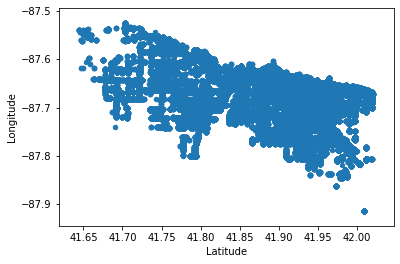

In [9]:
data.plot.scatter(x = 'Latitude', y ='Longitude')
plt.show()

This scatter plot shows that all of the data does seem to really be in Chicago.

In [10]:
no_location = data[data['Latitude'].isnull() & data['Longitude'].isnull()]
print('The number of rows without latitude, longitude: ', no_location.shape[0])
print('There are no rows that don\'t have one of either latitude, longitude and address.)
print('The address, however, is insufficient, and thus all samples without latitude & longitude will be removed.')

The number of rows without latitude, longitude:  207
There are no rows that don't have one of either latitude, longitude and address. The address, however, is insufficient, and thus all samples without latitude & longitude will be removed.


In [11]:
LONGITUDE_MIN = -88.0
LONGITUDE_MAX = -87.5
LATITUDE_MIN = 41.5
LATITUDE_MAX = 42.2
print('Size before looking at latitude and longitude: ', data.shape[0])
data = data.loc[(data['Longitude'] > LONGITUDE_MIN) & (data['Longitude'] < LONGITUDE_MAX) & (data['Latitude'] > LATITUDE_MIN) & (data['Latitude'] < LATITUDE_MAX)]
print('Size after looking at latitude and longitude: ', data.shape[0])
data.head()

Size before looking at latitude and longitude:  136931
Size after looking at latitude and longitude:  136724


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2320248,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313942.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,NaN,41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
2,2320245,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313945.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
5,2320229,HIMALAYAN SHERPA KITCHEN,HIMALAYAN SHERPA KITCHEN,2670751.0,Restaurant,Risk 1 (High),2701 W LAWRENCE AVE,CHICAGO,IL,60625.0,2019-10-22T00:00:00.000,Canvass,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.968442,-87.696304,"{'longitude': '41.968442053562335', 'latitude'..."
10,2316202,APOLLO'S 2000,APOLLO'S 2000,12125.0,Restaurant,Risk 1 (High),2875 W CERMAK RD,CHICAGO,IL,60623.0,2019-10-21T00:00:00.000,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.851748,-87.698583,"{'longitude': '41.85174848380867', 'latitude':..."
11,2320222,Taqueria El Dorado #2,Taqueria El Dorado #2,2463497.0,Restaurant,Risk 1 (High),3209 W LAWRENCE AVE,CHICAGO,IL,60625.0,2019-10-21T00:00:00.000,Canvass,Out of Business,NaN,41.968335,-87.708870,"{'longitude': '41.96833532113604', 'latitude':..."


## 4. Put all the restaurants together in a new dataframe 

So we can see the evolution. Also, it will be useful for the queries.
Get an ID: primary keys so we can index the different restaurants. 

In [12]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2320248,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313942.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,NaN,41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
2,2320245,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313945.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
5,2320229,HIMALAYAN SHERPA KITCHEN,HIMALAYAN SHERPA KITCHEN,2670751.0,Restaurant,Risk 1 (High),2701 W LAWRENCE AVE,CHICAGO,IL,60625.0,2019-10-22T00:00:00.000,Canvass,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.968442,-87.696304,"{'longitude': '41.968442053562335', 'latitude'..."
10,2316202,APOLLO'S 2000,APOLLO'S 2000,12125.0,Restaurant,Risk 1 (High),2875 W CERMAK RD,CHICAGO,IL,60623.0,2019-10-21T00:00:00.000,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.851748,-87.698583,"{'longitude': '41.85174848380867', 'latitude':..."
11,2320222,Taqueria El Dorado #2,Taqueria El Dorado #2,2463497.0,Restaurant,Risk 1 (High),3209 W LAWRENCE AVE,CHICAGO,IL,60625.0,2019-10-21T00:00:00.000,Canvass,Out of Business,NaN,41.968335,-87.708870,"{'longitude': '41.96833532113604', 'latitude':..."


In [40]:
df = data.copy()

In [25]:
data_name = data.groupby(["Address","DBA Name"])["Inspection Date"].apply(list).reset_index(name="Inspection Date")
df2 = data.groupby(["Address","DBA Name"])["Inspection Type"].apply(list).reset_index(name="Inspection Type")
df3 = data.groupby(["Address","DBA Name"])["Results"].apply(list).reset_index(name="Results")
df4 = data.groupby(["Address","DBA Name"])["Violations"].apply(list).reset_index(name="Violations")
df5 = data.groupby(["Address","DBA Name"])["Latitude"].apply(list).reset_index(name="Latitude")
df6 = data.groupby(["Address","DBA Name"])["Longitude"].apply(list).reset_index(name="Longitude")
print(df1.shape, df2.shape)
data_name = data_name.merge(df2, on = ['DBA Name','Address'])
data_name = data_name.merge(df3, on = ['DBA Name','Address'])
data_name = data_name.merge(df4, on = ['DBA Name','Address'])
data_name = data_name.merge(df5, on = ['DBA Name','Address'])
data_name = data_name.merge(df6, on = ['DBA Name','Address'])
data_name.head()

(18993, 8) (18993, 3)


,Address,DBA Name,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,1 E 83RD ST,SUBWAY,"[2018-12-12T00:00:00.000, 2018-03-20T00:00:00....","[Complaint, Complaint Re-Inspection, Complaint...","[Pass w/ Conditions, Pass, Fail, Pass, Pass, F...","[3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL ...","[41.7435467578672, 41.7435467578672, 41.743546...","[-87.62425218593408, -87.62425218593408, -87.6..."
1,1 E DELAWARE PL,MORE CUPCAKES,"[2017-06-29T00:00:00.000, 2016-10-24T00:00:00....","[Complaint, Canvass, Canvass, Canvass, Canvass...","[Pass, Pass, Pass, Pass w/ Conditions, Pass, P...","[nan, 32. FOOD AND NON-FOOD CONTACT SURFACES P...","[41.899030981951704, 41.899030981951704, 41.89...","[-87.62819227491327, -87.62819227491327, -87.6..."
2,1 E DELAWARE PL,STARBUCKS COFFEE # 13468,"[2017-08-25T00:00:00.000, 2016-06-29T00:00:00....","[Canvass, Canvass, License, License, License, ...","[Pass, Pass, Pass, Pass, Fail, Fail]","[nan, 38. VENTILATION: ROOMS AND EQUIPMENT VEN...","[41.899030981951704, 41.899030981951704, 41.89...","[-87.62819227491327, -87.62819227491327, -87.6..."
3,1 E DELAWARE PL,STARBUCKS COFFEE #13468,"[2015-09-02T00:00:00.000, 2015-08-25T00:00:00....","[Canvass Re-Inspection, Canvass, Canvass]","[Out of Business, Fail, Pass]",[18. NO EVIDENCE OF RODENT OR INSECT OUTER OPE...,"[41.899030981951704, 41.899030981951704, 41.89...","[-87.62819227491327, -87.62819227491327, -87.6..."
4,1 E ERIE ST,BERRY CHILL,[2011-08-30T00:00:00.000],[Canvass],[Out of Business],[nan],[41.89396426830079],[-87.62806283000644]


In [29]:
print('Since the address, ', data_name['Address'].is_unique, ', and the DBA Name, ', data_name['DBA Name'].is_unique, ', are not unique.')
print('We will make a unique identifier for each facility.')

Since the address,  False , and the DBA Name,  False , are not unique.
We will make a unique identifier for each facility.


In [66]:
dba_id = data_name['DBA Name'].str[0:6] + '-' + data_name['Address'].str[0:6] + '-' + data_name['Latitude'].apply(lambda x:str(x[0])[-4:]) + '-' + data_name['Longitude'].apply(lambda x:str(x[0])[-4:])
data_name.index = dba_id
data_name.index.name = 'Unique ID'
print(data_name.index.is_unique)
#data_name[data_name.index.duplicated(keep = False)]
# To make the unique ID's unique, we will need to join the rows with the same unique ID
# and add them to the latitude, longitude, violation, inspection date & type.

False
